In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1.4 Inequalities

## Knowledge

### Probability Inequalities

#### Markov's Inequality

Let $X$ be a non-negative random variable and suppose that $\mathbb{E}(X)$ exists. For any $t > 0$:

$$
\mathbb{P}(X > t) \leq \frac{\mathbb{E}(X)}{t}
$$

#### Chebyshevs Inequality

Let $\mu = \mathbb{E}(X)$ and $\sigma^2 = \mathbb{V}(X)$. Then

$$
\mathbb{P}(|X - \mu| \geq t) \leq \frac{\sigma^2}{t^2} \qquad \text{and} \qquad \mathbb{P}(|Z| \geq k) \leq \frac{1}{k^2}
$$

Where $Z = \frac{X - \mu}{\sigma}$. In particular:

$$
\mathbb{P}(|Z| > 2) \leq \frac{1}{4} \qquad \text{and} \qquad \mathbb{P}(|Z| > 3) \leq \frac{1}{9}
$$

#### Hoeffding's Inequality

Let $Y_1, \dots , Y_n$ be independent observations such that $\mathbb{E}(Y_i) = 0$ and $a_i \leq Y_i \leq b_i$. Let $\epsilon > 0$. Then for any $t > 0$,

$$
\mathbb{P}\left(\sum_{i=1}^n Y_i \geq \epsilon \right) \leq e^{-t\epsilon} \prod_{i=1}^n e^\frac{t^2(b_i-a_1)^2}{8}
$$

Let $X_1, \dots, X_n \sim \text{Bernoulli}(p)$. Then for any $\epsilon > 0$

$$
\mathbb{P}(|\overline{X}_n - p| > \epsilon) \leq 2 e^{-2n\epsilon^2}
$$

#### Mill's Inequality

Let $Z \sim N(0,1)$. Then

$$
\mathbb{P}(|Z| > t) \leq \sqrt{\frac{2}{\pi}} \frac{e^\frac{-t^2}{2}}{t}
$$

#### Cauchy-Schwartz Inequality

If $X$ and $Y$ have finite variances then

$$
\mathbb{E}|XY| \leq \sqrt{\mathbb{E}(X^2)\mathbb{E}(Y^2)}
$$

#### Jensen's Inequality

If $g$ is **convex**, then 

$$
\mathbb{E}g(X) \geq g\mathbb{E}(X)
$$

If $g$ is **concave**, then 

$$
\mathbb{E}g(X) \leq g\mathbb{E}(X)
$$

##### Note
A function $g$ is **convex** if for each $x,y$ and each $\alpha \in [0,1]$

$$
g(\alpha x + (1-\alpha)y) \leq \alpha g(x) + (1-\alpha)g(y)
$$

That is $g$ lies above any tangent line. A function $g$ is **concave** if $-g$ is convex.

## Computer Experiments

### Exercise 1

Let $X_1, \dots, X_n \sim \text{Bernoulli}(p)$

a) Let $\alpha > 0$ be fixed and define

$$
\epsilon_n = \sqrt{\frac{1}{2n}log\left(\frac{2}{\alpha}\right)}
$$

Let $\hat{p}_n = \frac{1}{n}\sum_{i=1}^n X_i$ (the sample mean). Define $C_n = (\hat{p}_n - \epsilon_n, \hat{p}_n + \epsilon_n)$. Use Hoeffding's inequality to show that

$$
\mathbb{P}(C_n \; \text{contains} \; p) \geq 1 - \alpha
$$

> We have by Hoeffding's inequality that
> $$
\mathbb{P}(|\hat{p}_n - p| > \epsilon_n) \leq 2e^{-2n\epsilon_n^2}
$$
> Which calculates to
> $$
2e^{-2n\epsilon_n^2} = 2e^{-2n \frac{1}{2n}log\left(\frac{2}{\alpha}\right)} = 2e^{-log\left(\frac{2}{\alpha}\right)} = 2e^{-(log(2) - log(\alpha)} = 2e^{log(\alpha) - log(2)} = 2\frac{e^{log(\alpha)}}{e^{log(2)}} = 2\frac{\alpha}{2} = \alpha
$$
> Combining together we get:
> $$
\mathbb{P}(p \notin C_n) = \mathbb{P}(|\hat{p}_n - p| > \epsilon_n) \leq \alpha
$$
> And thus $\mathbb{P}(p \in C_n) \geq 1 - \alpha$.

b) Let $\alpha = 0.05$ and $p = 0.4$. Conduct a simulation study to see how often the interval contains $p$ (called the **coverage**). Do this for various values of $n$ between 1 and 10000. Plot the coverage versus $n$.

In [71]:
# Set the parameters
alpha = 0.05
p = 0.4
number_of_simulations = 1000
sample_sizes = np.linspace(1, 10000, num=50, dtype=int)
results = []

for number_samples in sample_sizes:

    # Generate the samples
    x = np.random.binomial(
        size=(number_samples, number_of_simulations), n=1, p=p
    )

    # Get the sample mean
    sample_mean = x.mean(axis=0)

    # Calculate the 'errors'
    epsilon = np.sqrt(1 / (2 * number_samples) * np.log(2 / alpha))

    # Check for each one whether the p value is in the confidence interval
    results.append(
        ((sample_mean - epsilon < p) & (p < sample_mean + epsilon)).mean()
    )

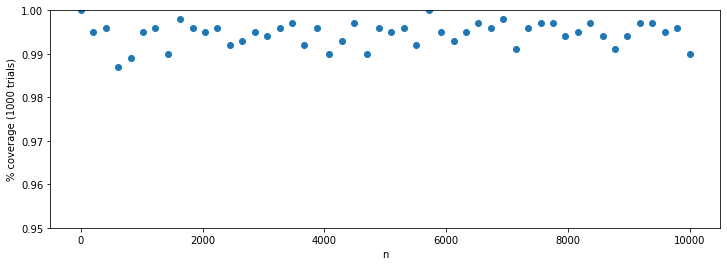

In [73]:
# Plot the results against the values of n
f, ax = plt.subplots(figsize=(12, 4))
ax.scatter(sample_sizes, results)
ax.set_ylim(0.95, 1)
ax.set_xlabel("n")
ax.set_ylabel(f"% coverage ({number_of_simulations} trials)");

c) Plot the length of the interval versus $n$. Suppose we want the length of the interval to be no more than $0.05$. How large should $n$ be?

> $$
2 \sqrt{\frac{1}{2n}log\left(\frac{2}{\alpha}\right)} < 0.05 \implies n > 2952
$$
> So there should be at least 2952 samples.

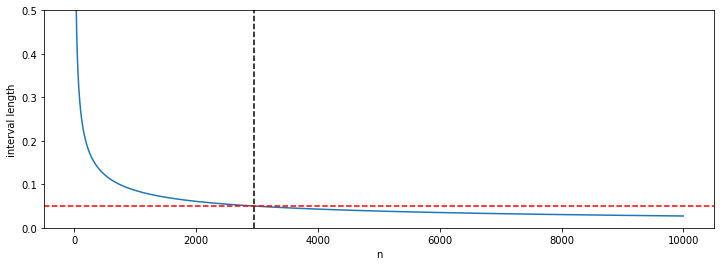

In [89]:
# Plot the intervals
x = np.arange(1, 10000, step=5)
y = 2 * np.sqrt(1 / (2 * x) * np.log(2 / alpha))

f, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y)
# Add the reference points for the additional requirement
plt.axhline(y=0.05, color="red", linestyle="dashed")
plt.axvline(x=2952, color="black", linestyle="dashed")
ax.set_xlabel("n")
ax.set_ylim(0, 0.5)
ax.set_ylabel("interval length");